# Tseting dollar cost averaging

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as s

In [185]:
# df = pd.read_csv("../data/btc.csv") 
df = pd.read_csv("../data/ft-dca-minute-test.csv")
df.dropna(inplace=True)

In [186]:
median = s.median(list(df.close))
median

14886.79

In [198]:
hours_break = 300 #number of hours to skip
dollars = 10. #number of dollars to buy each buying session
cooldown_limit = 5 #number of hours for cooldown for ML strat

In [199]:
buy_times = 0
purchased_amount = 0.
i = 0
plot = []
while i < len(df):
    buy_times += 1
    purchased_amount += dollars/df.iloc[i].close
    plot.append(df.iloc[i].close)
    plot = list(plot) + list(np.full(hours_break-1, None))
    i += hours_break
plot = plot[:len(df)]

In [200]:
buy_times_ml = 0
purchased_amount_ml = 0.
saved = hours_break
cooldown = 0
plotml = []
for i in range(len(df)):
    if df.iloc[i].target == 1 and saved>=hours_break and cooldown==0:
        buy_times_ml += 1
        purchased_amount_ml += dollars/df.iloc[i].close
        saved -= hours_break
        cooldown += cooldown_limit
        plotml.append(df.iloc[i].close)
    else:
        plotml.append(None)
    saved += 1
    cooldown -= 1 if cooldown > 0 else 0
    


In [201]:
buy_times, buy_times_ml

(67, 67)

In [202]:
purchased_amount, purchased_amount_ml

(0.04608208924466225, 0.04610720815008185)

In [203]:
buy_times*dollars/median

0.04500634455110873

In [204]:
dca = s.mean(list(filter(lambda x: x != None, plot)))
dca

14592.332388059702

In [205]:
ml = s.mean(list(filter(lambda x: x != None, plotml)))
ml

14584.929701492538

In [206]:
median

14886.79

In [207]:
print(len(df))
print(len(plot))


20000
20000


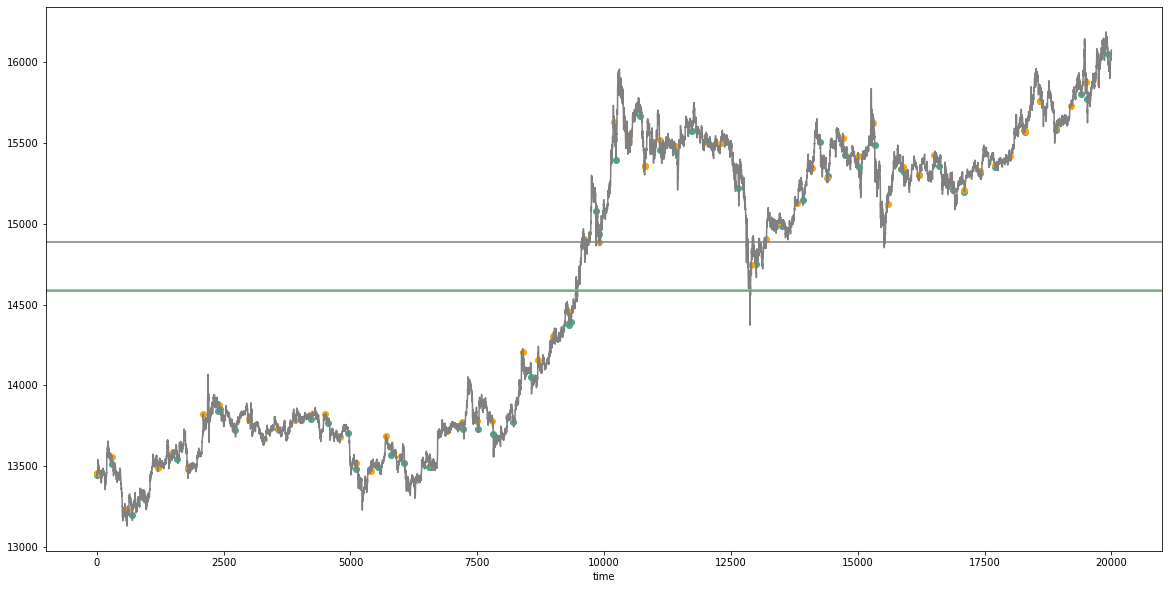

In [208]:
fig,ax = plt.subplots(figsize=(20, 10))

ax.scatter(range(len(df)),
        plotml,
        color="#43aa8b")
ax.scatter(range(len(df)),
        plot,
        color="orange")

ax.plot(df.close,
        color="gray")
ax.set_xlabel("time")

ax.axhline(y=median, color='gray', linestyle='-')
ax.axhline(y=dca, color='orange', linestyle='-')
ax.axhline(y=ml, color="#43aa8b", linestyle='-')


plt.show()
